In [1]:
# Import all libraries needed for the tutorial
import pandas as pd
import numpy as np
import psycopg2
import sys
from pandas.io import sql
from pandas.io.sql import read_sql
import statsmodels.formula.api as smf

#pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

Python version 3.4.3 |Anaconda 2.2.0 (x86_64)| (default, Mar  6 2015, 12:07:41) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version 0.16.1


In [2]:
con = psycopg2.connect("dbname=testdb user=tim")  
#cur = con.cursor()
print("con is open")

con is open


In [3]:
sql = "SELECT * FROM vam JOIN chiisat ON vam.school_id = chiisat.school_id WHERE vam.grade = %s AND vam.year = %s AND chiisat.grade = %s AND chiisat.year = %s ORDER BY vam.school_id;"

data = pd.read_sql(sql, con, index_col=None, coerce_float=True, params=['6th Grade','2012','6th Grade','2012'], parse_dates=None, columns=None, chunksize=None)

if con:
    con.close()

data[:3]

,school_name,school_id,network,grade,year,reading_studentsnumber,reading_vam,reading_confidence,reading_percentile,reading_color,math_studentsnumber,math_vam,math_confidence,math_percentile,math_color,school_name,school_id,unit,network,grade,year,readme,mathme,compme,readexc,mathexc,compexc,readmeet,mathmeet,compmeet,readblw,mathblw,compblw,readwrn,mathwrn,compwrn,readtst,mathtst
0,"LOCKE, A CHTR",400011,Charter/Contract Schools,6th Grade,2012,37.0,-1.8,-2.9 to -0.6,3,Red,37.0,-0.5,-1.2 to 0.2,34,Yellow,"LOCKE, A CHTR",400011,4730,Charter,6th Grade,2012,86.8,97.4,92.1,15.8,18.4,17.1,71.1,78.9,75.0,13.2,2.6,7.9,0.0,0.0,0.0,38,38
1,AMANDLA CHTR HS,400012,Charter/Contract Schools,6th Grade,2012,66.8,-0.5,-1.5 to 0.4,27,Yellow,67.8,0.6,0 to 1.1,72,Green,AMANDLA CHTR HS,400012,2035,Charter,6th Grade,2012,65.4,76.5,71.0,8.6,8.6,8.6,56.8,67.9,62.3,34.6,22.2,28.4,0.0,1.2,0.6,81,81
2,ASPIRA CHTR - HAUGAN,400017,Charter/Contract Schools,6th Grade,2012,88.8,-0.8,-1.7 to 0,17,Yellow,88.7,-0.4,-0.9 to 0.1,39,Yellow,ASPIRA CHTR - HAUGAN,400017,3500,Charter,6th Grade,2012,59.5,69.0,64.3,9.5,11.9,10.7,50.0,57.1,53.6,39.7,29.4,34.5,0.8,1.6,1.2,126,126


In [4]:
data.dtypes
#Check if sql request was successful - yes, number matches that found in excel
#data.info()

school_name                object
school_id                  object
network                    object
grade                      object
year                       object
reading_studentsnumber    float64
reading_vam               float64
reading_confidence         object
reading_percentile        float64
reading_color              object
math_studentsnumber       float64
math_vam                  float64
math_confidence            object
math_percentile           float64
math_color                 object
school_name                object
school_id                  object
unit                       object
network                    object
grade                      object
year                       object
readme                    float64
mathme                    float64
compme                    float64
readexc                   float64
mathexc                   float64
compexc                   float64
readmeet                  float64
mathmeet                  float64
compmeet      

In [5]:
data.shape

(439, 38)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     113.6
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           1.00e-23
Time:                        23:10:32   Log-Likelihood:                -1743.3
No. Observations:                 439   AIC:                             3491.
Df Residuals:                     437   BIC:                             3499.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     73.4832      0.614    119.591      0.000        72.276    74.691
x              6.4627      0.606     10.656      0.000         5.271     7.655
==============================================================================
Omnibus:                        7.162   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                7.352
Skew:                          -0.307   Prob(JB):                       0.0253
Kurtosis:                       2.839   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

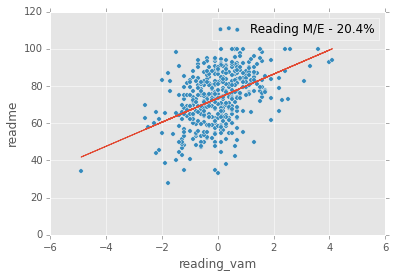

In [4]:
x = data['reading_vam']
y = data['readme']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readme',label="Reading M/E - 20.4%")
plt.ylim(0, 120)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     103.2
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           6.62e-22
Time:                        23:11:31   Log-Likelihood:                -1792.9
No. Observations:                 439   AIC:                             3590.
Df Residuals:                     437   BIC:                             3598.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     16.5828      0.688     24.104      0.000        15.231    17.935
x              6.8977      0.679     10.158      0.000         5.563     8.232
==============================================================================
Omnibus:                      169.260   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              593.329
Skew:                           1.768   Prob(JB):                    1.45e-129
Kurtosis:                       7.465   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

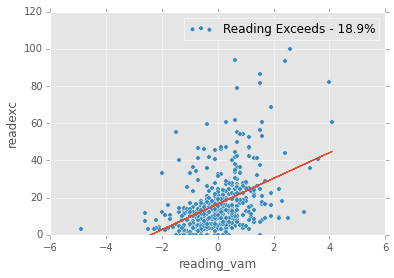

In [5]:
x = data['reading_vam']
y = data['readexc']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readexc',label="Reading Exceeds - 18.9%")
plt.ylim(0, 120)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6249
Date:                Sat, 15 Aug 2015   Prob (F-statistic):              0.430
Time:                        23:11:57   Log-Likelihood:                -1700.2
No. Observations:                 439   AIC:                             3404.
Df Residuals:                     437   BIC:                             3413.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     56.8965      0.557    102.150      0.000        55.802    57.991
x             -0.4346      0.550     -0.791      0.430        -1.515     0.646
==============================================================================
Omnibus:                       89.374   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.119
Skew:                          -0.983   Prob(JB):                     1.19e-52
Kurtosis:                       6.035   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

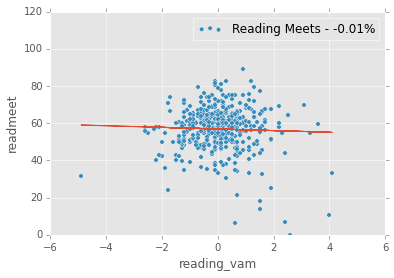

In [6]:
x = data['reading_vam']
y = data['readmeet']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readmeet',label="Reading Meets - -0.01%")
plt.ylim(0, 120)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     114.2
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           7.67e-24
Time:                        23:12:33   Log-Likelihood:                -1736.9
No. Observations:                 439   AIC:                             3478.
Df Residuals:                     437   BIC:                             3486.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     26.1224      0.606     43.140      0.000        24.932    27.312
x             -6.3876      0.598    -10.688      0.000        -7.562    -5.213
==============================================================================
Omnibus:                        7.588   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.771
Skew:                           0.324   Prob(JB):                       0.0205
Kurtosis:                       2.928   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

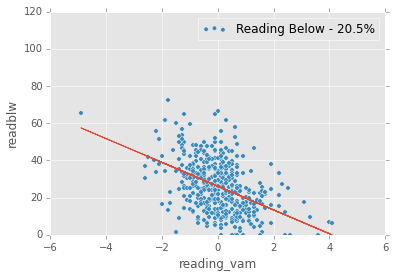

In [7]:
x = data['reading_vam']
y = data['readblw']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readblw',label="Reading Below - 20.5%")
plt.ylim(0, 120)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.689
Date:                Sat, 15 Aug 2015   Prob (F-statistic):              0.102
Time:                        23:12:55   Log-Likelihood:                -600.02
No. Observations:                 439   AIC:                             1204.
Df Residuals:                     437   BIC:                             1212.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3946      0.045      8.683      0.000         0.305     0.484
x             -0.0735      0.045     -1.640      0.102        -0.162     0.015
==============================================================================
Omnibus:                      268.614   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1693.699
Skew:                           2.736   Prob(JB):                         0.00
Kurtosis:                      10.915   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

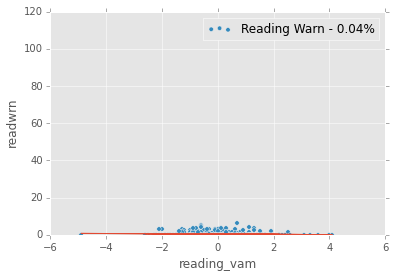

In [8]:
x = data['reading_vam']
y = data['readwrn']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readwrn',label="Reading Warn - 0.04%")
plt.ylim(0, 120)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     69.01
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           1.24e-15
Time:                        23:13:16   Log-Likelihood:                -1738.2
No. Observations:                 439   AIC:                             3480.
Df Residuals:                     437   BIC:                             3489.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     77.4914      0.608    127.356      0.000        76.296    78.687
x              4.8529      0.584      8.307      0.000         3.705     6.001
==============================================================================
Omnibus:                       31.415   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.599
Skew:                          -0.622   Prob(JB):                     6.85e-09
Kurtosis:                       3.713   Cond. No.                         1.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

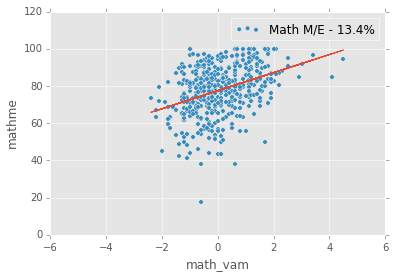

In [9]:
x = data['math_vam']
y = data['mathme']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathme',label="Math M/E - 13.4%")
plt.ylim(0, 120)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     63.84
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           1.21e-14
Time:                        23:13:26   Log-Likelihood:                -1825.9
No. Observations:                 439   AIC:                             3656.
Df Residuals:                     437   BIC:                             3664.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     17.1121      0.743     23.029      0.000        15.652    18.573
x              5.7000      0.713      7.990      0.000         4.298     7.102
==============================================================================
Omnibus:                      184.746   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              686.752
Skew:                           1.927   Prob(JB):                    7.47e-150
Kurtosis:                       7.763   Cond. No.                         1.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

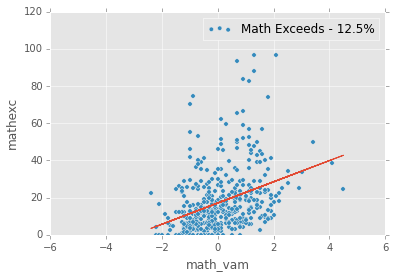

In [10]:
x = data['math_vam']
y = data['mathexc']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathexc',label="Math Exceeds - 12.5%")
plt.ylim(0, 120)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.318
Date:                Sat, 15 Aug 2015   Prob (F-statistic):              0.129
Time:                        23:13:40   Log-Likelihood:                -1716.6
No. Observations:                 439   AIC:                             3437.
Df Residuals:                     437   BIC:                             3445.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     60.3824      0.579    104.245      0.000        59.244    61.521
x             -0.8466      0.556     -1.522      0.129        -1.940     0.246
==============================================================================
Omnibus:                      115.374   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              334.585
Skew:                          -1.234   Prob(JB):                     2.22e-73
Kurtosis:                       6.492   Cond. No.                         1.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

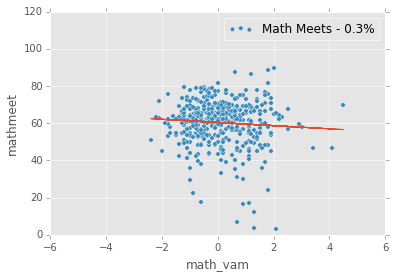

In [11]:
x = data['math_vam']
y = data['mathmeet']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathmeet',label="Math Meets - 0.3%")
plt.ylim(0, 120)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     67.70
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           2.21e-15
Time:                        23:13:53   Log-Likelihood:                -1722.8
No. Observations:                 439   AIC:                             3450.
Df Residuals:                     437   BIC:                             3458.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     21.8048      0.588     37.112      0.000        20.650    22.960
x             -4.6411      0.564     -8.228      0.000        -5.750    -3.532
==============================================================================
Omnibus:                       36.311   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.931
Skew:                           0.649   Prob(JB):                     6.44e-11
Kurtosis:                       3.938   Cond. No.                         1.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

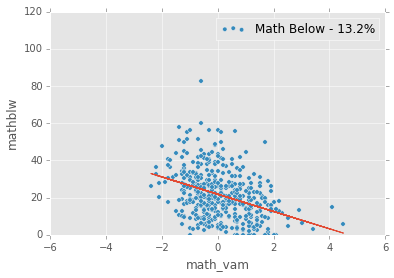

In [12]:
x = data['math_vam']
y = data['mathblw']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathblw',label="Math Below - 13.2%")
plt.ylim(0, 120)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     12.00
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           0.000584
Time:                        23:14:04   Log-Likelihood:                -744.47
No. Observations:                 439   AIC:                             1493.
Df Residuals:                     437   BIC:                             1501.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7051      0.063     11.145      0.000         0.581     0.829
x             -0.2104      0.061     -3.464      0.001        -0.330    -0.091
==============================================================================
Omnibus:                      272.868   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2095.636
Skew:                           2.687   Prob(JB):                         0.00
Kurtosis:                      12.257   Cond. No.                         1.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

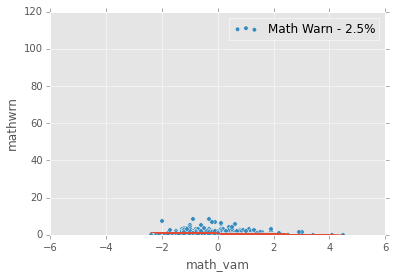

In [13]:
x = data['math_vam']
y = data['mathwrn']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathwrn',label="Math Warn - 2.5%")
plt.ylim(0, 120)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()